In [ ]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
import time
from PIL import Image

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import tensorflow.keras.layers as layers
from tensorflow.keras import datasets, losses

In [ ]:
# Google Drive path, probably don't need this for github
projectPath = '/content/drive/MyDrive/Colab Notebooks/Data'

In [ ]:
# # Google Drive path, probably don't need this for github
projectSharedDrivePath = '/content/drive/Shareddrives/CAP5610 Project'

In [ ]:
# Data paths
# part 1 includes augmented images
imagesPart1_dir = projectSharedDrivePath + '/data/HAM10000_images_part_1_original'
imagesPart1Aug_dir = projectSharedDrivePath + '/data/HAM10000_images_part_1'
imagesPart2_dir = projectSharedDrivePath + '/data/HAM10000_images_part_2'

In [ ]:
os.getcwd()

'/content'

In [ ]:
aug_imagesPart1_dir = projectSharedDrivePath + '/data/HAM10000_images_part_1'

In [ ]:
img_dirs = os.listdir(projectPath)
img_dirs

['HAM10000_metadata.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_2',
 '.ipynb_checkpoints',
 'HAM10000_metadata_labels.csv',
 'HAM10000_metadata_labels_part2.csv',
 'HAM10000_metadata_labels_part1.csv',
 'Andres',
 'HAM10000_images_part_1']

In [ ]:
# List images in augmented images folder
images_names = os.listdir(aug_imagesPart1_dir)
images_names[0:10]

In [ ]:
# Temp arrays to hold image data
imagesPart1 = []
imagesPart2 = []
augImagesPart1 = []

In [ ]:
# Augmented Images Read
images_dir = os.listdir(aug_imagesPart1_dir)
for image_name in images_dir[0:5000]:
  image_path = os.path.join(aug_imagesPart1_dir,image_name)
  image = np.array(Image.open(image_path).resize((28,28)).convert('RGB'))
  augImagesPart1.append(image)

In [ ]:
# Images Part 1 Read
images_dir = os.listdir(imagesPart1_dir)
for image_name in images_dir:
  image_path = os.path.join(imagesPart1_dir,image_name)
  image = np.array(Image.open(image_path).resize((28,28)).convert('RGB'))
  imagesPart1.append(image)

In [ ]:
# Images Part 2 Read
images_dir = os.listdir(imagesPart2_dir)
for image_name in images_dir[0:5000]:
  image_path = os.path.join(imagesPart2_dir,image_name)
  image = np.array(Image.open(image_path).resize((28,28)).convert('RGB'))
  imagesPart2.append(image)

In [ ]:
# Convert to array
imagesPart1 = np.asarray(imagesPart1)

In [ ]:
augImagesPart1 = np.asarray(augImagesPart1)

In [ ]:
augImagesPart1.shape

(5000, 28, 28, 3)

In [ ]:
augImagesPart1 = augImagesPart1.reshape(5000,2352)

In [ ]:
# Save array data for future use, very important to avoid processing all the images again
np.savetxt('augImagesPart1.csv',augImagesPart1,delimiter=',')

In [ ]:
imagesPart1.shape

(5000, 28, 28, 3)

In [ ]:
imagesPart1[0:5]

In [ ]:
from tempfile import TemporaryFile

In [ ]:
imagesPart1_file = TemporaryFile()
np.save(imagesPart1_file,imagesPart1)

In [ ]:
imgsPart1 = imagesPart1.reshape(5000,2352)

In [ ]:
np.savetxt('imagesPart1.csv',imgsPart1,delimiter=',')

In [ ]:
temp = pd.read_csv(projectSharedDrivePath + '/data/Andres/ImageArrays/imagesPart1.csv',header=None)
temp = np.asarray(temp)
temp = temp.reshape(temp.shape[0],28,28,3)

In [ ]:
temp[0:5]

In [ ]:
temp.shape

(4999, 28, 28, 3)

In [ ]:
aug_imgsPart1.shape

(22871, 28, 28, 3)

In [ ]:
#### Read augmented images array Part 1 ####
df_AugImagesPart1 = pd.read_csv(projectSharedDrivePath + '/data/augImagesPart1.csv',header=None)
df_AugImagesPart1.head()

df_AugImagesPart1_Labels = pd.read_csv(projectSharedDrivePath + '/data/augImagesPart1_Labels.csv')
df_AugImagesPart1_Labels = np.asarray(df_AugImagesPart1_Labels['dx'])

df_AugImagesPart1 = np.asarray(df_AugImagesPart1)
print("shape = " + str(df_AugImagesPart1.shape))

X_train_augPart1, X_test_augPart1, y_train_augPart1, y_test_augPart1 = train_test_split(df_AugImagesPart1, df_AugImagesPart1_Labels, stratify=df_AugImagesPart1_Labels, 
                                                                                        test_size=0.20, random_state=101)

temp = np.asarray(df_AugImagesPart1_Labels)
print("0 count = ", (temp == 0).sum())
print("1 count = ", (temp == 1).sum())
print("2 count = ", (temp == 2).sum())
print("3 count = ", (temp == 3).sum())
print("4 count = ", (temp == 4).sum())
print("5 count = ", (temp == 5).sum())
print("6 count = ", (temp == 6).sum())

print("X-train-augPart1 shape = " + str(X_train_augPart1.shape))
X_train_augPart1 = X_train_augPart1.reshape(X_train_augPart1.shape[0],28,28,3)
print("X-train-augPart1 shape = " + str(X_train_augPart1.shape))

X_test_augPart1 = X_test_augPart1.reshape(X_test_augPart1.shape[0],28,28,3)
print("X-test-augPart1 shape = " + str(X_test_augPart1.shape))

X_train_augPart1 = tf.convert_to_tensor(X_train_augPart1, np.float64)
print("X-train-augPart1 type = " + str(type(X_train_augPart1)))

X_test_augPart1 = tf.convert_to_tensor(X_test_augPart1, np.float64)
print("X-test-augPart1 shape = " + str(type(X_test_augPart1)))

X_train_augPart1 = tf.pad(X_train_augPart1, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_augPart1 = tf.pad(X_test_augPart1, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_augPart1.shape)
print(X_test_augPart1.shape)

X_train_augPart1 = tf.image.resize(X_train_augPart1,(227,227))
X_test_augPart1 = tf.image.resize(X_test_augPart1,(227,227))

print(X_train_augPart1.shape)
print(X_test_augPart1.shape)

shape = (5000, 2352)
0 count =  0
1 count =  514
2 count =  1095
3 count =  115
4 count =  2025
5 count =  142
6 count =  1109
X-train-augPart1 shape = (4000, 2352)
X-train-augPart1 shape = (4000, 28, 28, 3)
X-test-augPart1 shape = (1000, 28, 28, 3)
X-train-augPart1 type = <class 'tensorflow.python.framework.ops.EagerTensor'>
X-test-augPart1 shape = <class 'tensorflow.python.framework.ops.EagerTensor'>
(4000, 32, 32, 3)
(1000, 32, 32, 3)
(4000, 227, 227, 3)
(1000, 227, 227, 3)


In [ ]:
#### Process 28x28 RGB Images Part 1 MetaData Labels #####
df_hmnist_imagesPart1 = pd.read_csv(projectSharedDrivePath + '/Project/Data/HAM10000_metadata_labels_part1.csv')
df_hmnist_imagesPart1.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,24306,2,histo,80.0,male,scalp
1,HAM_0000118,24307,2,histo,80.0,male,scalp
2,HAM_0002730,24308,2,histo,80.0,male,scalp
3,HAM_0002730,24309,2,histo,80.0,male,scalp
4,HAM_0001466,24310,2,histo,75.0,male,ear


In [ ]:
imagesPart1Labels = np.asarray(df_hmnist_imagesPart1['dx'])
imagesPart1Labels[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
#### Process 28x28 RGB Data #####
df_hmnist_28_28_RGB = pd.read_csv(projectPath + '/hmnist_28_28_RGB.csv/hmnist_28_28_RGB.csv')
df_hmnist_28_28_RGB.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2


In [ ]:
df_hmnist_28_28_RGB_Labels = np.asarray(df_hmnist_28_28_RGB['label'])
df_hmnist_28_28_RGB = df_hmnist_28_28_RGB.drop('label',axis=1)
df_hmnist_28_28_RGB.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2312,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,217,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,187,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,176,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,160,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,219,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92


In [ ]:
hmnist_28_28_RGB = np.asarray(df_hmnist_28_28_RGB)
hmnist_28_28_RGB.shape

(10015, 2352)

In [ ]:
hmnist_28_28_RGB[0:10]

array([[192, 153, 193, ..., 185, 154, 177],
       [ 25,  14,  30, ...,  25,  14,  27],
       [192, 138, 153, ..., 136, 104, 117],
       ...,
       [161, 121, 105, ...,  32,  18,  19],
       [125,  84,  85, ...,  19,   8,  13],
       [228, 179, 194, ..., 216, 146, 154]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hmnist_28_28_RGB, df_hmnist_28_28_RGB_Labels, test_size=0.30, random_state=101)

In [ ]:
temp = np.asarray(df_hmnist_28_28_RGB_Labels)
print("0 count = ", (temp == 0).sum())
print("1 count = ", (temp == 1).sum())
print("2 count = ", (temp == 2).sum())
print("3 count = ", (temp == 3).sum())
print("4 count = ", (temp == 4).sum())
print("5 count = ", (temp == 5).sum())
print("6 count = ", (temp == 6).sum())

0 count =  327
1 count =  514
2 count =  1099
3 count =  115
4 count =  6705
5 count =  142
6 count =  1113


In [ ]:
X_train.shape

(7010, 2352)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,3)
X_train.shape

(7010, 28, 28, 3)

In [ ]:
X_test = X_test.reshape(X_test.shape[0],28,28,3)
X_test.shape

(3005, 28, 28, 3)

In [ ]:
X_train = tf.convert_to_tensor(X_train, np.float64)
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
X_test = tf.convert_to_tensor(X_test, np.float64)
type(X_test)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
X_train = tf.pad(X_train, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2],[2,2],[0,0]])/255

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7010, 32, 32, 3)
(3005, 32, 32, 3)


In [ ]:
X_train = tf.image.resize(X_train,(227,227))

In [ ]:
X_test = tf.image.resize(X_test,(227,227))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7010, 227, 227, 3)
(3005, 227, 227, 3)


In [ ]:
#### Process 28x28 L Data #####
df_hmnist_28_28_L = pd.read_csv(projectPath + '/hmnist_28_28_L.csv/hmnist_28_28_L.csv')
df_hmnist_28_28_L.head()

df_hmnist_28_28_L_Labels = np.asarray(df_hmnist_28_28_L['label'])
df_hmnist_28_28_L = df_hmnist_28_28_L.drop('label',axis=1)
df_hmnist_28_28_L.head()

hmnist_28_28_L = np.asarray(df_hmnist_28_28_L)
print("28x28L shape = " + str(hmnist_28_28_L.shape))

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(hmnist_28_28_L, df_hmnist_28_28_L_Labels, test_size=0.30, random_state=101)

temp = np.asarray(df_hmnist_28_28_L_Labels)
print("0 count = ", (temp == 0).sum())
print("1 count = ", (temp == 1).sum())
print("2 count = ", (temp == 2).sum())
print("3 count = ", (temp == 3).sum())
print("4 count = ", (temp == 4).sum())
print("5 count = ", (temp == 5).sum())
print("6 count = ", (temp == 6).sum())

print("X-train-L shape = " + str(X_train_L.shape))
X_train_L = X_train_L.reshape(X_train_L.shape[0],28,28,1)
print("X-train-L shape = " + str(X_train_L.shape))

X_test_L = X_test_L.reshape(X_test_L.shape[0],28,28,1)
print("X-test-L shape = " + str(X_test_L.shape))

X_train_L = tf.convert_to_tensor(X_train_L, np.float64)
print("X-train-L type = " + str(type(X_train_L)))

X_test_L = tf.convert_to_tensor(X_test_L, np.float64)
print("X-test-L shape = " + str(type(X_test_L)))

X_train_L = tf.pad(X_train_L, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_L = tf.pad(X_test_L, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_L.shape)
print(X_test_L.shape)

X_train_L = tf.image.resize(X_train_L,(227,227))
X_test_L = tf.image.resize(X_test_L,(227,227))

print(X_train_L.shape)
print(X_test_L.shape)

X_train_L = tf.image.grayscale_to_rgb(X_train_L,name=None)
X_test_L = tf.image.grayscale_to_rgb(X_test_L,name=None)

print(X_train_L.shape)
print(X_test_L.shape)

28x28L shape = (10015, 784)
0 count =  327
1 count =  514
2 count =  1099
3 count =  115
4 count =  6705
5 count =  142
6 count =  1113
X-train-L shape = (7010, 784)
X-train-L shape = (7010, 28, 28, 1)
X-test-L shape = (3005, 28, 28, 1)
X-train-L type = <class 'tensorflow.python.framework.ops.EagerTensor'>
X-test-L shape = <class 'tensorflow.python.framework.ops.EagerTensor'>
(7010, 32, 32, 1)
(3005, 32, 32, 1)
(7010, 227, 227, 1)
(3005, 227, 227, 1)
(7010, 227, 227, 3)
(3005, 227, 227, 3)


In [ ]:
####### Reading the original Part 1 Images #########
imagesPart1 = pd.read_csv(projectSharedDrivePath + '/data/imagesPart1.csv',header=None)
imagesPart1 = np.asarray(imagesPart1)
imagesPart1Labels = pd.read_csv(projectSharedDrivePath + '/data/HAM10000_metadata_labels_part1.csv')
imagesPart1Labels = np.asarray(imagesPart1Labels['dx'])
X_train_part1, X_test_part1, y_train_part1, y_test_part1 = train_test_split(imagesPart1, imagesPart1Labels, stratify=imagesPart1Labels, test_size=0.20, random_state=101)

In [ ]:
X_train_part1.shape

(4000, 2352)

In [ ]:
X_train_part1 = X_train_part1.reshape(X_train_part1.shape[0],28,28,3)
X_train_part1.shape

(4000, 28, 28, 3)

In [ ]:
X_test_part1.shape

(1000, 2352)

In [ ]:
X_test_part1 = X_test_part1.reshape(X_test_part1.shape[0],28,28,3)
X_test_part1.shape

(1000, 28, 28, 3)

In [ ]:
X_train_part1 = tf.convert_to_tensor(X_train_part1, np.float64)
type(X_train_part1)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
X_test_part1 = tf.convert_to_tensor(X_test_part1, np.float64)
type(X_test_part1)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
X_train_part1 = tf.pad(X_train_part1, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_part1 = tf.pad(X_test_part1, [[0, 0], [2,2],[2,2],[0,0]])/255

In [ ]:
print(X_train_part1.shape)
print(X_test_part1.shape)

(4000, 32, 32, 3)
(1000, 32, 32, 3)


In [ ]:
X_train_part1 = tf.image.resize(X_train_part1,(227,227))
X_test_part1 = tf.image.resize(X_test_part1,(227,227))

In [ ]:
print(X_train_part1.shape)
print(X_test_part1.shape)

(4000, 227, 227, 3)
(1000, 227, 227, 3)


In [ ]:
# Load the model if you have already saved it
from tensorflow.keras.models import load_model
model = load_model(projectSharedDrivePath + '/data/Andres/Models/alexnet_28x28RGB_99_200.h5')

In [ ]:
# Setting up the model
model = Sequential()
model.add(layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),activation='relu',padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),activation='relu',padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(7,activation='softmax'))

In [ ]:
# Setting up the model to compile and train
# You can change the X and y values depending on what images data you are reading.
# Run cells under ####### Reading the original Part 1 Images ######### or 
# Run cells under #### Read augmented images array Part 1 ####
# Swap X and y for corresponding pre-processing
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train_augPart1, y_train_augPart1, batch_size=99, epochs=100)

Epoch 1/100
41/41 [==============================] - 13s 87ms/step - loss: 9.1538 - accuracy: 0.3715
Epoch 2/100
41/41 [==============================] - 3s 74ms/step - loss: 1.4344 - accuracy: 0.4315
Epoch 3/100
41/41 [==============================] - 3s 73ms/step - loss: 1.3736 - accuracy: 0.4392
Epoch 4/100
41/41 [==============================] - 3s 75ms/step - loss: 1.3762 - accuracy: 0.4595
Epoch 5/100
41/41 [==============================] - 3s 74ms/step - loss: 1.3219 - accuracy: 0.4818
Epoch 6/100
41/41 [==============================] - 3s 74ms/step - loss: 1.2977 - accuracy: 0.4938
Epoch 7/100
41/41 [==============================] - 3s 74ms/step - loss: 1.2719 - accuracy: 0.5023
Epoch 8/100
41/41 [==============================] - 3s 74ms/step - loss: 1.2672 - accuracy: 0.4852
Epoch 9/100
41/41 [==============================] - 3s 74ms/step - loss: 1.2639 - accuracy: 0.4978
Epoch 10/100
41/41 [==============================] - 3s 73ms/step - loss: 1.2426 - accuracy: 0.488

In [ ]:
model.evaluate(X_test_augPart1, y_test_augPart1)

32/32 [==============================] - 1s 17ms/step - loss: 0.7742 - accuracy: 0.7190


[0.7742268443107605, 0.718999981880188]

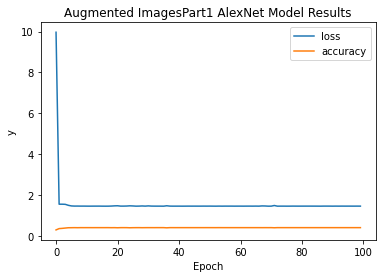

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(xlabel='Epoch',ylabel='y',title='Augmented ImagesPart1 AlexNet Model Results')

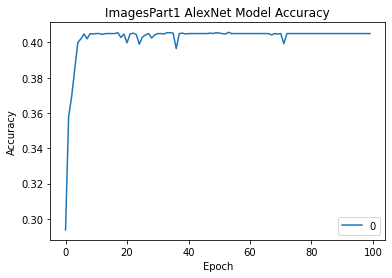

In [ ]:
loss_df = pd.DataFrame(model.history.history['accuracy'])
loss_df.plot(xlabel='Epoch',ylabel='Accuracy',title='ImagesPart1 AlexNet Model Accuracy')

In [ ]:
print('Loss average = ' + str(np.mean(loss_df['loss'])))
print('Accuracy average = ' + str(np.mean(loss_df['accuracy'])))
#print('Val_loss average = ' + str(np.mean(loss_df['val_loss'])))
#print('Val_accuracy average = ' + str(np.mean(loss_df['val_accuracy'])))

Loss average = 1.0094104969501496
Accuracy average = 0.6304199960827828


In [ ]:
print('Accuracy Max = ' + str(np.max(loss_df['accuracy'])))

Accuracy Max = 0.797249972820282


In [ ]:
model.evaluate(x=X_test_augPart1,y=y_test_augPart1,verbose=0)

[1.6923178434371948, 0.4050000011920929]

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
alexNet_45_45_model = load_model(projectSharedDrivePath + '/Models/alexnet_28x28RGB_45_45.h5')

In [ ]:
test_predictions = alexNet_45_45_model.predict(X_test_part1)
print(test_predictions[0:5])
print(test_predictions.shape)

[[3.9304756e-02 4.9224392e-02 1.1299401e-01 1.1689125e-02 6.7215711e-01
  1.4907504e-02 9.9719547e-02 2.5885126e-06 5.5927359e-07 3.8426475e-07]
 [3.9304756e-02 4.9224392e-02 1.1299401e-01 1.1689125e-02 6.7215711e-01
  1.4907504e-02 9.9719547e-02 2.5885126e-06 5.5927359e-07 3.8426475e-07]
 [3.9304756e-02 4.9224392e-02 1.1299401e-01 1.1689125e-02 6.7215711e-01
  1.4907504e-02 9.9719547e-02 2.5885126e-06 5.5927359e-07 3.8426475e-07]
 [3.9304756e-02 4.9224392e-02 1.1299401e-01 1.1689125e-02 6.7215711e-01
  1.4907504e-02 9.9719547e-02 2.5885126e-06 5.5927359e-07 3.8426475e-07]
 [3.9304756e-02 4.9224392e-02 1.1299401e-01 1.1689125e-02 6.7215711e-01
  1.4907504e-02 9.9719547e-02 2.5885126e-06 5.5927359e-07 3.8426475e-07]]
(933, 10)


In [ ]:
predictLabel = np.argmax(test_predictions, axis=1)
predictLabel = predictLabel.tolist()
predictLabel[0:5]

[4, 4, 4, 4, 4]

In [ ]:
df_hmnist_imagesPart1 = pd.read_csv(projectSharedDrivePath + '/Data/HAM10000_metadata_labels_part1.csv')
df_hmnist_imagesPart1.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,24306,2,histo,80.0,male,scalp
1,HAM_0000118,24307,2,histo,80.0,male,scalp
2,HAM_0002730,24308,2,histo,80.0,male,scalp
3,HAM_0002730,24309,2,histo,80.0,male,scalp
4,HAM_0001466,24310,2,histo,75.0,male,ear


In [ ]:
imagesPart1Labels = np.asarray(df_hmnist_imagesPart1['dx'])
imagesPart1Labels[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
# Saving a model
from tensorflow.keras.models import load_model
model.save(projectSharedDrivePath + '/data/Andres/Models/alexnet_imagesPart1_80_20.h5')

In [ ]:
# Load the model if you have already saved it
from tensorflow.keras.models import load_model
modelPart1 = load_model(projectSharedDrivePath + '/data/Andres/Models/alexnet_imagesPart1_99_100.h5')

In [ ]:
loss_df = pd.DataFrame(modelPart1.history.history)
loss_df.plot()

AttributeError: ignored